- 구매하는 환경"을 "문맥(Context)"라고 하며, 이를 기반으로한 추천시스템을 "문맥기반 추천시스템"이라 불리는데요,
- 이전시간에 배운 FM모델은 각 특성 간의 Pair-wise의 상호관계를 임베딩하여 활용하는 방법이었습니다. 하지만, 현실세계에서 구매가 진행되는 상황에는 고객과 유저의 특성뿐 아니라 그 환경에 대한 정보도 있을 것입니다. 이러한 "환경에 대한 정보"인 컨텍스트 데이터를 다루는 문제를 살펴봅시다.
## 컨텍스트 데이터(Context data)
- 유저의 아이템에 대한 활동이 있을 때 그 순간의 환경에 대한 데이터를 컨텍스트 데이터(Context Data) 즉, 문맥/환경 데이터라고 합니다.
현실세계에서 유저는 특성 시점에서 이러한 문맥과 환경의 영향을 받아 구매나 소비가 발생하게 되는데요,
예컨데 "나는 비가오는 날 운동할 때에는 트와이스의 "cheer up" 노래가 듣고싶어진다." 같은 것입니다.

컨텍스트 데이터는 고객의 행동에 대한 시점에 따라 달라지기 때문에, 각 로그데이터(상호작용데이터)마다 서로 다른 값들을 갖게 됩니다.
다시 말해서, 상호작용이 발생하는 시점에서 현재 상호작용에 영향을 끼치고 있는 데이터를 컨텍스트 데이터라고 할 수 있습니다.
( 고객정보, 상품정보 데이터는 "해당 시점"의 데이터는 아님 )

추천시스템의 문맥/환경을 고려한 접근은 최근 서비스 트렌드인 "초개인화"의 활약으로 전 세계적인 관심을 받고 있습니다. 특히 세계 최대의 온라인 쇼핑 중개기업인 "아마존"에서는 이러한 컨텍스트 데이터를 활용하여 고객을 세분화하여 "0.1인 마케팅"을 실현하는 것으로도 유명합니다.
### 특성간의 복잡한 상호관계
- 컨텍스트 데이터는 이전시간에 배운 Factorization Machine 모델로 단순히 각 특성간 pair-wise의 상호관계만을 고려하기에는 정말 복잡한 상호관계를 가지고 있습니다.
예를 들자면, "일하는 시간" , "비오는 날씨", "아티스트"는 단순히 (시간, 날씨), (날씨, 직업), (시간, 직업)과 같이 쌍(pair)로만 상호관계를 갖는 것이 아닙니다.
(시간, 날씨, 직업)을 함께 고려한 상호작용이 고객의 행동에 영향을 미치게 되지요. 여러가지의 각 특성들은 더욱 복잡하게 관계되어 고객의 행동에 영향을 끼치게 됩니다.

이렇듯 쌍 이상의 상호관계를 Order-N 이라 표현합니다.
### Order-N 상호관계
- Order-0 : 각 특성(Feature)의 가중치를 전혀 고려하지 않음 : bias 부분
- Order-1 : 특성 각각의 값에 대한 영향 고려 : Linear Regression Model 부분
- Order-2 : 특성 각각의 Pair에 대한 상호 관계의 영향 고려 : Factorization Machine Model 부분
- Order-N : 특성간 서로 세 단계 이상으로 상호간 복잡한 관계의 영향 고려 : DeepLearning Model 부분
- 예시 : app-category, time-stamp : (점심시간에는 음식 배달앱을 많이 쓴다.) ; 두가지 특성의 상호작용의 반영을 order-2
app-category, user_age, user_gender : (10대 남자는 알피지 게임을 많이 쓴다.) ; 세가지 특성의 상호작용의 반영을 order-3
이렇게, 쌍이상의 복잡한 상호관계가 엮여있는 것을 order-N이라고 합니다.
앞서 배웠던 Linear Regression 모델은 Order-1 을 반영하고, Factorization Machine 모델은 Order-2 를 반영합니다.
(global bias가 Order-0를 반영합니다.)
![order-n](https://i.imgur.com/hcFGGnI.png)

하지만 컨텍스트 데이터는 여러가지 특성의 복잡한 관계가 유저의 행동에 영향을 주므로 Order-N 인 high-order를 반영하는 추천 모델을 만드는 것이 이번 시간의 문제 정의입니다.

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google_drive_downloader import GoogleDriveDownloader as gdd
import seaborn as sb
import sklearn

plt.style.use("dark_background")

## Frappe Dataset
- Frappe 데이터는 2015년 5월에 컨텍스트 인지 모바일 앱 추천시스템을 위해 공개된 현실 데이터인데요,
유저의 앱에 대한 사용 카운트가 96200여개의 로그로 구성되어있는 데이터입니다. 데이터셋 페이퍼

In [214]:
gdd.download_file_from_google_drive(file_id="1bUh06cUbqSi8CxtS5W91vclMCc2q0jxj", dest_path="./frappe.csv")
uses_df = pd.read_csv("frappe.csv")

gdd.download_file_from_google_drive(file_id="1liTfFR_WdF8-ozFh5dyFhWDM0NyF5s7L", dest_path="./frappe_meta.csv")
meta_df = pd.read_csv("frappe_meta.csv", sep="\t")

In [144]:
uses_df.sample(5)

user  item    daytime  weekday isweekend homework  cost  weather  \
43916   136   229  afternoon   sunday   weekend  unknown  free  unknown   
85772   410    39     sunset   sunday   weekend  unknown  free   cloudy   
63029   222   319    evening   monday   workday  unknown  free    sunny   
70649   271    17    evening  tuesday   workday  unknown  free  unknown   
21284    66   911  afternoon  tuesday   workday  unknown  free    sunny   

             country  city  cnt  
43916        unknown     0    7  
85772          Spain   369    1  
63029        Croatia   419    1  
70649        unknown     0  220  
21284  United States     0    1

- daytime : 시간대("afternoon", "evening", "morning", "night", "noon", "sunrise", "sunset")
- weekday : 요일
- isweekend : 주중/주말("workday"/"weekend")
- homework : 업무 중/가정("work"/"home"/"unknown")
- cost : 유료/무료("paid"/"free")
- weather : 날씨("cloudy", "drizzle", "foggy", "rainy", "sleet", "snowy", "stormy", "sunny", "unknown")
- country : 국가
- city : 도시(0~1087)
- cnt : 카운트(1~28752)

In [5]:
meta_df.sample(5)

item                         package          category  \
1930  1930            com.activision.elite     Entertainment   
2603  2603   com.innovativegames.knockdown   Arcade & Action   
2176  2176                   com.houzz.app         Lifestyle   
1530  1530  com.bom.android.newsreader.tha  News & Magazines   
1048  1048              com.neomtel.mxhome      Productivity   

                  downloads                    developer  \
1930  1,000,000 - 5,000,000  Activision Publishing, Inc.   
2603  1,000,000 - 5,000,000             Innovative games   
2176      100,000 - 500,000                        Houzz   
1530        10,000 - 50,000            Bestofmedia Group   
1048  1,000,000 - 5,000,000             NeoMTel Co.,Ltd.   

                                                   icon language  \
1930  http://d2lh3rxs7crswz.cloudfront.net/com.activ...       en   
2603  http://d2lh3rxs7crswz.cloudfront.net/com.innov...       en   
2176  http://d2lh3rxs7crswz.cloudfront.net/com.houzz...       en   
1530  http://d2lh3rxs7crswz.cloudfront.net/com.bom.a...       en   
1048  http://d2lh3rxs7crswz.cloudfront.net/com.neomt...       en   

                                            description  \
1930  Access your Call of Duty® HQ anywhere, anytime...   
2603  The game is to knock down the boxes using a sl...   
2176  Called the "Wikipedia of interior and exterior...   
1530  Tom’s Hardware: The Authority On Tech Get inst...   
1048  MXHome Launcher (Live Petal Theme) MX Home is ...   

                             name price rating  \
1930          Call of Duty® ELITE  Free    3.5   
2603                   Knock Down  Free    3.8   
2176  Houzz Interior Design Ideas  Free    4.8   
1530               Tom's Hardware  Free    2.7   
1048          MXHome Launcher 3.1  Free    4.4   

                                             short desc  
1930                              Play Together Better.  
2603                                                NaN  
2176                                                NaN  
1530  Tom’s Hardware: The Authority On TechGet insta...  
1048                             Art 3D Launcher MXHome

- 추천 목적에 따라서 추천시스템의 알고리즘과 측정 방법 등이 크게 달라집니다. 따라서, 우리는 주어진 데이터로 구성할 추천시스템의 목적을 명확히 할 필요가 있습니다. 이번 Frappe Dataset이라면 다음과 같은 시나리오를 구성해 볼 수 있겠지요.

- 현재 상황에서 특정 어플이 없는 유저(user)에게 어플 추천 광고 집행
- 특정 어플이 있는 유저에게 사용량(cnt)을 더욱 증가시키기 위해 상황에 따른 알림
- 고객에게 상황에 따른 어플 내부 결제 유도 쿠폰 제공
- 특정어플을 고객이 다양한 환경에서 사용하도록 유도하는 최적의 알림 타이밍

- 특정 상황에서 유저가 한번도 사용하지 않았던 어플 중 가장 관심있어 할만한 어플을 찾아주는 문제로 정의할 수 있습니다.

In [4]:
#1번 이상 로그가 있는 Context 에 대해서는 모두 "클릭을 했다" 라는 의미로 `True`로 변경해줍니다.
# uses_df["cnt"] = True

### 요일 및 시간대별 앱 사용량 파악하기

In [49]:
pt = pd.pivot_table(uses_df[["daytime", "weekday", "cnt"]], index="daytime", columns="weekday", values="cnt", aggfunc=np.sum)

col_ord = pt.sum(axis=0).sort_values().index
row_ord = pt.sum(axis=1).sort_values().index

pt = pt.loc[row_ord, col_ord]

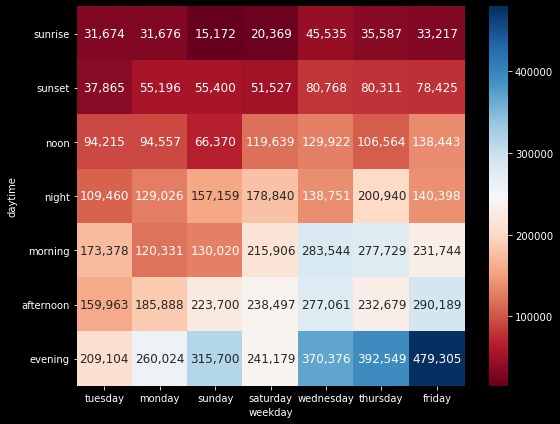

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

sb.heatmap(ax=ax, data=pt, annot=True, annot_kws={"size": 12}, fmt=",", cmap="RdBu")

fig.tight_layout()

- 화요일 일출 시간에 앱을 가장 적게 사용하고 금요일 저녁 시간대에 가장 많이 사용함을 알 수 있습니다.

### 날씨에 앱 사용량 차이 파악하기

In [47]:
uses_df.loc[uses_df["weather"]=="rainy", :]

user  item    daytime    weekday isweekend homework  cost weather  \
80        1     5  afternoon     friday   workday  unknown  free   rainy   
323       1   838  afternoon     friday   workday  unknown  free   rainy   
420       2     5    evening   thursday   workday     home  free   rainy   
656       2    78    evening   thursday   workday     home  free   rainy   
770       3     3       noon  wednesday   workday  unknown  free   rainy   
...     ...   ...        ...        ...       ...      ...   ...     ...   
93119   822    38  afternoon  wednesday   workday  unknown  paid   rainy   
93193   844    44    morning     friday   workday  unknown  free   rainy   
93194   844    58    morning     friday   workday  unknown  free   rainy   
93198   844  1127    morning     friday   workday  unknown  paid   rainy   
93271   896   227     sunset     sunday   weekend  unknown  free   rainy   

              country  city  cnt  
80              Spain     0   88  
323             Spain     0  596  
420             Spain   369    8  
656             Spain   369    2  
770     United States  1028    3  
...               ...   ...  ...  
93119           Spain   369    1  
93193  United Kingdom   401    1  
93194  United Kingdom   401    1  
93198  United Kingdom   401    1  
93271  United Kingdom     0    1  

[6388 rows x 11 columns]

In [62]:
pt1 = pd.pivot_table(uses_df.loc[uses_df["weather"]=="rainy", ["daytime", "weekday", "cnt"]], index="daytime", columns="weekday", values="cnt", aggfunc=np.sum)

col_ord = pt1.sum(axis=0).sort_values().index
row_ord = pt1.sum(axis=1).sort_values().index

pt1 = pt1.loc[row_ord1, col_ord1]

pt2 = pd.pivot_table(uses_df.loc[uses_df["weather"]=="sunny", ["daytime", "weekday", "cnt"]], index="daytime", columns="weekday", values="cnt", aggfunc=np.sum)

pt2 = pt2.loc[row_ord, col_ord]

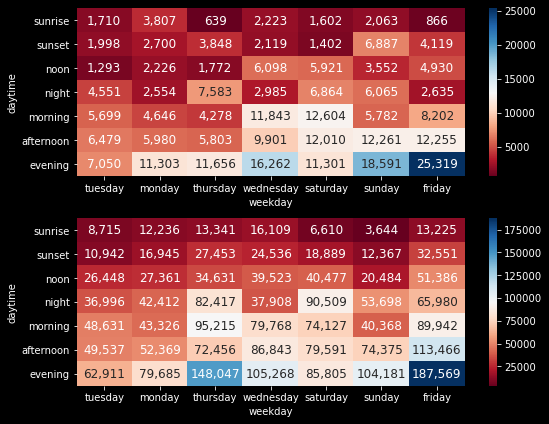

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sb.heatmap(ax=ax1, data=pt1, annot=True, annot_kws={"size": 12}, fmt=",", cmap="RdBu")
sb.heatmap(ax=ax2, data=pt2, annot=True, annot_kws={"size": 12}, fmt=",", cmap="RdBu")

fig.tight_layout()

## DeepFM
### 특징 1
- 각 피쳐의 임베딩을 FM모델과 DeepLearning 모델이 공유하고 있다.
- 피쳐 엔지니어링에 들어가는 수고를 많이 덜어낼 수 있습니다.

### 특징 2
- 미리 학습(Pre-trained)하지 않고 한번의 Input으로 End-to-end로 진행한다.
- 다른 모델의 경우 FM으로 미리 한번 학습된 Embedding으로 Deeplearning모델을 학습하는 경우가 있습니다. 한번에 모델을 학습시킬 수 있으므로, 학습의 어려움이 적습니다.
### deepFM 모델 구성하기
#### (1) input layer 구성하기
- 모델의 입력 변수로는 아래의 피쳐들이 필요합니다.
$$
x_{user},\ x_{item},\ x_{daytime},\ x_{weekday},\ x_{isweekend},\ x_{homework},\ x_{cost},\ x_{weather},\ x_{country},\ x_{city}
$$

In [215]:
uses_df.sample(5)

user  item    daytime    weekday isweekend homework  cost  weather  \
56243   186    48       noon   thursday   workday  unknown  free   cloudy   
89537   506    73    evening   saturday   weekend  unknown  free    rainy   
75713   300   181     sunset     sunday   weekend  unknown  free  unknown   
68004   254   797    morning     sunday   weekend  unknown  free    sunny   
38569   117   181  afternoon  wednesday   workday  unknown  free   cloudy   

             country  city  cnt  
56243          Spain   369   42  
89537      Indonesia     0    7  
75713        unknown     0    1  
68004  United States     0  149  
38569          Chile   151    1

- frappe dataset는 전부 categorical vatiables로 구성되어 있으므로 입력값의 형태는 0-d, 즉 Index로만 존재하게 됩니다.

In [216]:
for col in uses_df.columns:    
    print(f"{col} | {uses_df[col].shape}")

user | (93308,)
item | (93308,)
daytime | (93308,)
weekday | (93308,)
isweekend | (93308,)
homework | (93308,)
cost | (93308,)
weather | (93308,)
country | (93308,)
city | (93308,)
cnt | (93308,)


- 위의 구성에서 93308은 데이터의 갯수를 의미하는 축이고, 데이터의 Shape은 이후 숫자가 데이터의 Shape이 됩니다. 현재 각 데이터의 Shape은 0차원입니다. 이러한 데이터를 입력받기 위해서는 차원이 ()인 Input레이어를 만들어 주어야 합니다.

In [217]:
#input layer를 구성합니다.
inputs = {}
for col in uses_df.columns:
    if col != "cnt":
        inputs[col] = tf.keras.Input(shape=(), name="a")

In [218]:
inputs

{'user': <tf.Tensor 'a_10:0' shape=(None,) dtype=float32>,
 'item': <tf.Tensor 'a_11:0' shape=(None,) dtype=float32>,
 'daytime': <tf.Tensor 'a_12:0' shape=(None,) dtype=float32>,
 'weekday': <tf.Tensor 'a_13:0' shape=(None,) dtype=float32>,
 'isweekend': <tf.Tensor 'a_14:0' shape=(None,) dtype=float32>,
 'homework': <tf.Tensor 'a_15:0' shape=(None,) dtype=float32>,
 'cost': <tf.Tensor 'a_16:0' shape=(None,) dtype=float32>,
 'weather': <tf.Tensor 'a_17:0' shape=(None,) dtype=float32>,
 'country': <tf.Tensor 'a_18:0' shape=(None,) dtype=float32>,
 'city': <tf.Tensor 'a_19:0' shape=(None,) dtype=float32>}

###  선형회귀 부분 구성하기(order-1)
$$
logits_{lr} = W_{user}X_{user} + W_{item}X_{item} + ⋯ + W_{city}X_{city} + b
$$

- features가 categorical variables이므로 예를 들어 user : 927, item : 14, daytime : morning, ... 인 경우 다음 식으로 간단히 표현됩니다.
$$
logits_{lr} = w_{user\ :\ 927} + w_{item\ :
 14} + w_{city\ :\ morning} + ⋯ + b
$$

In [31]:
uses_df

user  item    daytime  weekday isweekend homework  cost  weather  \
0         0     0    morning   sunday   weekend  unknown  free    sunny   
1         0     9  afternoon   friday   workday  unknown  free   cloudy   
2         0     9    evening   friday   weekend  unknown  free   cloudy   
3         0    14  afternoon   friday   workday  unknown  free   cloudy   
4         0    16    evening   friday   weekend  unknown  free   cloudy   
...     ...   ...        ...      ...       ...      ...   ...      ...   
93303   927   526    morning   friday   workday  unknown  free  unknown   
93304   936    11      night  tuesday   workday  unknown  free   cloudy   
93305   936    57      night   friday   workday  unknown  free   cloudy   
93306   936   126      night  tuesday   workday  unknown  free   cloudy   
93307   936   229      night   friday   workday  unknown  free   cloudy   

             country  city  cnt  
0      United States     0    1  
1      United States  1023    2  
2      United States  1023    9  
3      United States  1023    2  
4      United States  1023    1  
...              ...   ...  ...  
93303        unknown     0    1  
93304       Malaysia   746    1  
93305       Malaysia   746   13  
93306       Malaysia   746    3  
93307       Malaysia   746    3  

[93308 rows x 11 columns]

In [6]:
#embedding layer를 구성합니다.
lr_embs = []
for col in uses_df.columns:
    if col != "cnt":
        lr_embs.append(tf.keras.layers.Embedding(input_dim= uses_df[col].nunique(), output_dim=1, name=f"{col}_lr_emb")(inputs[col]))

In [15]:
lr_embs

[<tf.Tensor 'user_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'item_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'daytime_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'weekday_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'isweekend_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'homework_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'cost_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'weather_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'country_lr_emb/Identity:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'city_lr_emb/Identity:0' shape=(None, 1) dtype=float32>]

In [41]:
class LR(tf.keras.layers.Layer):
    def build(self, input_shape):
        # 레이어 연결시 0으로 초기화된 학습 가중치 생성
        self.b = self.add_weight(shape=(1, ), initializer="zeros", trainable=True)
        super().build(input_shape)
    
    def call(self, inputs, **kwargs):
        logits = tf.add_n(inputs) + self.b
        return logits

In [42]:
logits_lr = LR(name="lr")(lr_embs)

In [43]:
logits_lr

<tf.Tensor 'lr_1/Identity:0' shape=(None, 1) dtype=float32>

### (2) Factorization 부분 구성하기(Order-2)

In [8]:
fm_size = 5

fm_embs = []
for col in uses_df.columns:
    if col != "cnt":
#         fm_embs.append(tf.keras.layers.Embedding(input_dim= uses_df[col].nunique(), output_dim=fm_size, name=f"{col}_fm_emb")(inputs[col]))
        print(tf.keras.layers.Embedding(input_dim= uses_df[col].nunique(), output_dim=fm_size, name=f"{col}_fm_emb").get_weights)

<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA2497ECC8>>
<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA24970F48>>
<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA248A3F48>>
<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA24970F48>>
<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA24970F48>>
<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA2488E048>>
<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA24970F48>>
<bound method Layer.get_weights of <tensorflow.python.keras.layers.embeddings.Embedding object at 0x000001CA2488E048>>
<bound method Layer.get_weights of <tensorflow.p

In [12]:
tf.keras.layers.Embedding(input_dim= uses_df[col].nunique(), output_dim=fm_size, name=f"{col}_fm_emb")

In [11]:
fm_embs[0]

IndexError: list index out of range

### 3. 데이터 구성하기
#### (1) 명목형 데이터의 인덱싱 표 만들기
- 명목형 데이터에서 각 값을 임베딩 행렬에서 몇 번째 벡터를 가르키는지를 지칭하는 임베딩 인덱스로 바꾸어 주기 위해서, 인덱싱 표를 생성합니다.

In [145]:
cat2idx = {}
cat2size = {}
for col in uses_df.columns:
    if col != "cnt":
        uses_df[col] = uses_df[col].astype("category")
        
        cat2idx[col] = {cat:idx for idx, cat in enumerate(uses_df[col].cat.categories)}
        cat2size[col] = len(uses_df[col].cat.categories)

In [146]:
print(cat2idx)

{'user': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119, 121: 120,

In [147]:
cat2size

{'user': 792,
 'item': 2072,
 'daytime': 7,
 'weekday': 7,
 'isweekend': 2,
 'homework': 3,
 'cost': 2,
 'weather': 9,
 'country': 78,
 'city': 223}

#### (2) 각 column의 값을 embedding matrix의 index로 변경하기

In [148]:
for col, dic in cat2idx.items():
    uses_df[col] = uses_df[col].map(dic)

#### (3) train set과 test set으로 구분하기

In [171]:
train, test = sklearn.model_selection.train_test_split(uses_df, train_size=0.8)

#### (4) 네거티브샘플링 적용하기
현재 해당 데이터는 특정 컨택스트에서 고객의 앱에 대한 사용 여부로서 "Positive" 데이터만 존재하고 있습니다. 즉, 고객 행동의 긍정적인 행동만 기록되어있다는 것입니다. 우리는 고객이 클릭하지 않은 앱에 대한 사용 여부, 즉 Positive 데이터 한개당 Negative 데이터 3개씩을 생성하되 item 이외의 다른 feature는 고정하고 item을 무작위로 결정하는 식으로 진행해보도록 하겠습니다.

In [184]:
def do_neg_sampling(df, ratio=3):
    neg_sampling = pd.concat([df]*ratio)
    neg_sampling["item"] = df["item"].sample(n=len(neg_sampling), replace=True).values
    # "네거티브 데이터"는 카운트가 존재하지 않음
    neg_sampling["cnt"] = 0

    sampling = pd.concat([df, neg_sampling])
    sampling = sampling.drop_duplicates(sampling.columns.drop("cnt"))
    return sampling

In [185]:
train_sampling = do_neg_sampling(train)
test_sampling = do_neg_sampling(test)

- (3) Input 과 Target 분리
- 데이터 중에서 종속 변수가 되는 요소들( X )과 독립 변수가 되는 클릭 유무을 나누도록 하겠습니다.

In [187]:
train_x = train.drop(["cnt"], axis=1)
train_y = train[["cnt"]]

test_x = test.drop(["cnt"], axis=1)
test_y = test[["cnt"]]

- (4) 텐서로 바꾸어 주기

In [207]:
batch_size = 512

train_set = tf.data.Dataset.from_tensor_slices(({k:v.values.astype("int16") for k, v in train_x.iteritems()}, train_y.values)).shuffle(len(train_x)).batch(batch_size, drop_remainder=True)
test_set = tf.data.Dataset.from_tensor_slices(({k:v.values.astype("int16") for k, v in test_x.iteritems()}, test_y.values)).shuffle(len(test_x)).batch(batch_size, drop_remainder=True)

In [208]:
train_set

<BatchDataset shapes: ({user: (512,), item: (512,), daytime: (512,), weekday: (512,), isweekend: (512,), homework: (512,), cost: (512,), weather: (512,), country: (512,), city: (512,)}, (512, 1)), types: ({user: tf.int16, item: tf.int16, daytime: tf.int16, weekday: tf.int16, isweekend: tf.int16, homework: tf.int16, cost: tf.int16, weather: tf.int16, country: tf.int16, city: tf.int16}, tf.int64)>

In [211]:
train_x

user item daytime weekday isweekend homework cost weather country city
38883  119   56       3       3         0        1    0       8      75    0
35512  104   19       1       4         1        1    0       0      75  181
80882  355  506       0       3         0        1    0       7      55  148
20930   64  190       1       0         0        0    0       0      17    0
93222  770  283       2       5         1        1    0       7      75    0
...    ...  ...     ...     ...       ...      ...  ...     ...     ...  ...
31665   90   23       3       2         0        1    0       3      12    0
89659  501  462       0       2         0        1    0       0      75  173
15745   48   36       2       1         1        1    1       7      67    0
43259  133  100       4       1         1        2    0       0      75    0
55681  183  148       0       0         1        0    0       7      75  201

[74646 rows x 10 columns]